In [127]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

# Ejemplo 14.3 

La ecuación diferencia del problema es 
$$-\frac{d}{dx}\left[(x+1)\frac{du}{dx}\right] = 1$$

Primero discretizamos el espacio en $n$ partes y construimos los "mesh points" $x_j = j\frac{l}{n} = jh, j = 0, \dots, n$. Ahora consideramos las $n-1$ funciones base $\varphi_{j}$ ya descritas por el método. Recordando que la solución al método corresponde a encontrar el $c$ tal que 
 $$Mc = b$$
 donde $M$ y $b$ para este problema corresponden a
 $$M_{ij} = \int_0^l (x+1) \varphi'_i\varphi'_jdx  \ \ \ ;  \ \ \  b_i =  \int_0^l \varphi_i dx$$

Usando las siguientes definiciones de $\varphi_j:$
$$\varphi_j = \begin{cases}
               \frac{1}{h}(x-x_{j-1}) & x_{j-1} \leq x \leq x_{j}\\
               \frac{1}{h}(x_{j+1} - x) & x_{j} \leq x \leq x_{j+1}\\
               0 & \text{else}
               \end{cases}$$
               
Por lo tanto, $M$ y $b$ se reducen a
$$M_{ij} = \begin{cases}
               -\frac{1}{h^2}[ h + h^2 \left(i + \frac{1}{2}\right)] & j = i+1\\
               -\frac{1}{h^2}[ h + h^2 \left(j + \frac{1}{2}\right)] & i = j+1\\
               \frac{2}{h^2}[ jh^2 + h] &  i = j \\
               0 & |i-j| > 1
               \end{cases}$$
               
$$b_i = h $$

Considerando esto, construimos $b$ y $M$ para encontrar $c$

In [128]:

## Construcción de M y b usando lo derivado analíticamente
def SolExacta(x):
    return (-x + (np.log(x+1))/(np.log(2)))

def fin_elem_1d(n,h):
    b = np.zeros([n-1])
    M = np.zeros([n-1,n-1])
    mesh = np.linspace(0,1, n+1)
    for i in range(n-1):
        b[i] = h
        M[i,i] = 2*(i+1) + 2/h
        for j in range(n-1):
            if (np.abs(i-j) == 1):
                k = min(i,j) + 1
                M[i,j] =  -(k + 0.5) -1/h
    return np.linalg.inv(M)@b, mesh, M, b

#Este código retorna los coeficientes c_i 

<IPython.core.display.Javascript object>


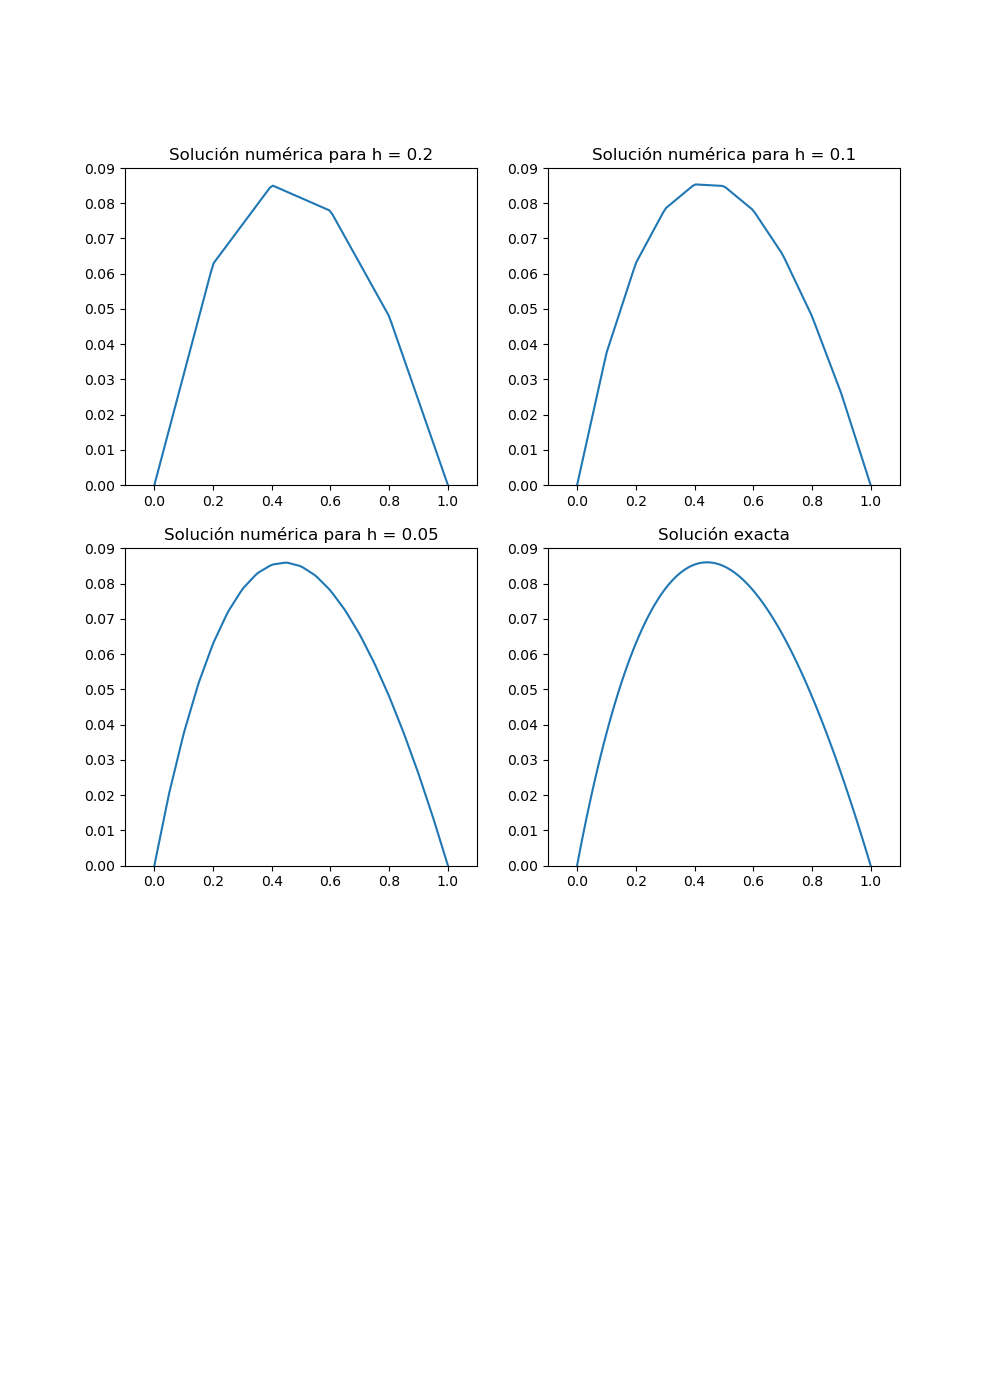

Text(0.5, 1.0, 'Solución exacta')

In [129]:
#Ahora graficamos los resultados, para n = [5, 10, 20], h = [0.2, 0.1, 0.05] 

#Esta función calcula los phi_j en un punto x.
def phi(i, mesh, x, h):
    xant, xac, xsig, = mesh[i-1], mesh[i], mesh[i+1]
    xac = mesh[i]
    rta = 0
    #Ya conocemos cual phi_i es, ahora usamos la definición
    if(xant <= x <= xac):
        rta = (x-xant)/h
    elif(xac <= x <= xsig):
        rta = (xsig-x)/h
    
    return rta
        
def approx(c, mesh, x, h):
    Phi = np.array([phi(i+1, mesh, x, h) for i in range(len(c))])
    
    return c@Phi #Valor de la aproximación en x

valh = [0.2, 0.1, 0.05]
valn = [5, 10, 20]
t = np.linspace(0.,1,100) #Puntos muestrales para solución exacta


fig = plt.figure(figsize=(10,14))
for i in range(len(valh)):
    ax = fig.add_subplot(3,2,i+1)
    h, n = valh[i], valn[i] 
    c, mesh, M, b = fin_elem_1d(n,h)
    uapprox = np.array([approx(c, mesh, x, h) for x in t])
    phi1= [phi(1, mesh, x, h) for x in t]
    ax.plot(t, uapprox)
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(0, 0.09)
    ax.set_title("Solución numérica para h = {}".format(h))
ax = fig.add_subplot(3,2,4)
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(0, 0.09)
ax.plot(t, SolExacta(t))
ax.set_title("Solución exacta")


# Ejemplo 14.8



<IPython.core.display.Javascript object>


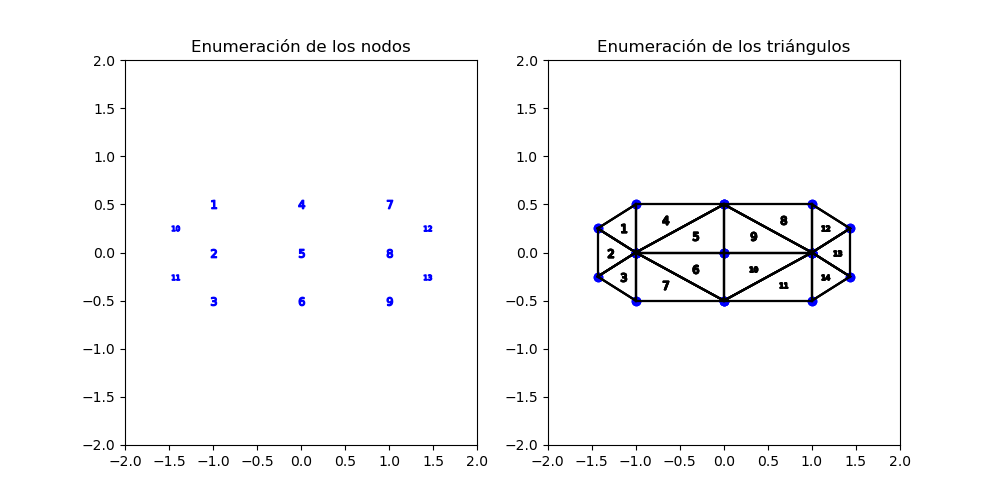

In [130]:
#Primero se generará la discretización del dominio. A continuación se muestran los nodos

#Se agregarán manualmente y también para deterninar su nombramiento. Luego se le darán otros indices a los triangulos,
#aue no serán los mismos

sin = np.sin(np.pi/6)
cos = np.cos(np.pi/6)
nodos = np.array([[-2, 1],
         [-2, 0],
         [-2,-1],
         [0, 1],
         [0, 0],
         [0,-1],
         [2,1],
         [2, 0],
         [2, -1],
         [-2-cos, sin],
         [-2-cos, -sin],
         [2+cos, sin],
         [2+cos, -sin]
        ])
#se ecribieron mal las escalas pero estas dos lineas reescalan a la 
#figura pedida (rectangulo con altura 1 y base 2, entonces los semicirculos tiene radio 1/2)

nodos[:,0] = nodos[:,0]/2 
nodos[:,1] = nodos[:,1]/2

#Se codifican todos los triangulos, teniendo en cuenta los nodos que lo definen
triangulos = [[1,2,10],
              [2,10,11],
              [2,3,11],
              [1,2,4],
              [2,4,5],
              [2,5,6],
              [2,3,6],
              [4,7,8],
              [4,5,8],
              [5,6,8],
              [6,8,9],
              [7,8,12],
              [8,12,13],
              [8,9,13]
             ]

#graficamos la discretización del espacio y denominamos cada uno de los triangulos por un número
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,2)
ax2 = fig.add_subplot(1,2,1)
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_title("Enumeración de los triángulos")
ax2.set_title("Enumeración de los nodos")
ax2.set_xlim(-2,2)
ax2.set_ylim(-2,2)
for i in range(len(triangulos)):
    t = triangulos[i]
    t = np.array(t) - np.array([1,1,1]) #para que la enumeración de los nodos sea igual a la de python
    n1, n2, n3, = nodos[t[0]], nodos[t[1]], nodos[t[2]]
    cm = (n1+n2+n3)/3 #se calcula el centro de masa para poner ahí la enumeración de cada triangulo
    nodtri = [n1,n2, n3]
    nodtri2 = [n1, n2, n3, n1]
    #se dibujan las aristas así como los nodos
    for j in range(len(t)):
        ax.scatter(nodtri[j][0], nodtri[j][1], color = "blue") #Nodo
        ax.scatter(cm[0],cm[1], marker = "${}$".format(i+1), color = "black")
        for k in range(len(nodtri)):
            ax.plot([nodtri2[k][0],nodtri2[k+1][0]],[nodtri2[k][1],nodtri2[k+1][1]], color = "black")
#Indicamos cual es cada uno de los nodos
for i in range(len(nodos)):
    ax2.scatter(nodos[i][0], nodos[i][1], color = "blue", marker="${}$".format(i+1)) #Nodo enumerado


<IPython.core.display.Javascript object>


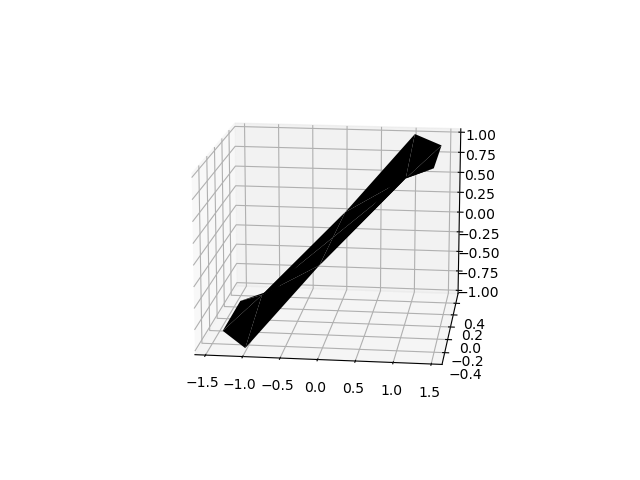

In [131]:
ax = plt.figure().add_subplot(projection='3d')
c1,c2,c3 = -0.73205,0,0.73205 #valores obtenidos con el código de las matrices, la enumeración de los nodos del codigo es 
#distinta a la usada para el cálculo.
alturas = [-1,c1,-1,0,c2,0, 1, c3, 1,-1,-1,1,1] #valores de las alturas en cada uno de los nodos

nodos3D = np.zeros([13,3])
nodos3D[:,0] = nodos[:,0]
nodos3D[:,1] = nodos[:,1]
nodos3D[:,2] = alturas
for i in range(len(triangulos)):
    t = triangulos[i]
    t = np.array(t) - np.array([1,1,1]) #para que la enumeración de los nodos sea igual a la de python
    n1, n2, n3, = nodos3D[t[0]], nodos3D[t[1]], nodos3D[t[2]]
    nodtri = np.array([n1,n2, n3])
    nodtri2 = [n1, n2, n3, n1]  
    ax.plot_trisurf(nodtri[:,0],nodtri[:,1],nodtri[:,2], color="black") 
plt.show()

